# Stock Performance Prediction and Investment Analysis

## Introduction and Objective
This project aims to predict the stock performance of a selected publicly traded company using a multiple linear regression model. The dataset is sourced from Yahoo Finance, containing historical data on stock performance.

## Problem Statement
Given the historical performance characteristics of a stock, the objective is to develop a predictive model to forecast its future performance and assess the investment worthiness of the stock.

## Data Description
The dataset includes information such as date, closing price, volume, opening price, high price, and low price. This data will be preprocessed for use in the regression model.

## Data Set-Up and Exploration
### Data Cleaning and Preprocessing
The following steps are applied to prepare the data:
- Convert dates to numerical values.
- Handle missing values, if any.
- Normalize data for consistent scaling.
The data is explored to understand its structure, clean it, and ensure its suitability for modeling. We handle missing values, convert prices to numeric formats, and engineer new features like days since start.

## Preparing Training and Testing Sets
The data is split into training and testing sets to validate the model's performance. A standard split of 80% for training and 20% for testing is applied.
Data is split into training and testing sets to validate the model's predictions. An 80-20 split is used.

## Model Building
### Multiple Linear Regression Model
The model uses `Days` and `Volume` as input features to predict the `Close/Last` price.
The multiple linear regression model is built to predict the closing price of the stock based on its volume and days since the start date.

## Model Improvement
### Feature Selection
Significant variables are selected to enhance model performance. Features with high correlation and statistical significance are retained.

## Model Results and Interpretation
- Coefficients of the regression model are analyzed.
- Residuals are calculated and visualized to evaluate the model's fit.
- Predictions are compared with actual values.

## Statistical and Christian Worldview Considerations
### Financial Considerations
Statistical analyses such as MSE, R-squared, and residual plots guide the decision-making process.

### Christian Worldview Considerations
From a Christian perspective, ethical factors such as the company's mission, impact on society, and adherence to Christian values are considered. These factors may not always be quantifiable but play a crucial role in the investment decision.
In addition to statistical and financial considerations, ethical factors such as a company's impact on the environment and society, as well as its alignment with Christian values, are considered in decision-making.

## Final Conclusion
The stock's investment worthiness is evaluated based on statistical predictions, financial metrics, and ethical considerations from a Christian worldview. Final recommendations are provided.

## Gabriel Marcelino
## Performance Predictions
### January 15, 2025
#### Stock: NVIDIA (NVDA)

### Investment Objective
The investment objective is to analyze if, based on market data for the last few years, there will be 10% increase in the stock price of NVIDIA Corporation (NVDA) over the next four months. This target aligns with a short-term growth strategy, leveraging the company's strong position in the AI, gaming, and data center markets. The objective assumes favorable market conditions, continued demand for NVIDIA's cutting-edge GPUs, and potential revenue growth from its innovative AI solutions. 

1. Import Required Libraries

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

2. Data set-up and exploration

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Busters\AppData\Local\Temp\ipykernel_50080\3719117986.py:6: SyntaxWarning: invalid escape sequence '\$'
  data['Close/Last'] = data['Close/Last'].replace({'\$': ''}, regex=True).astype(float)  # Remove $ and convert to float


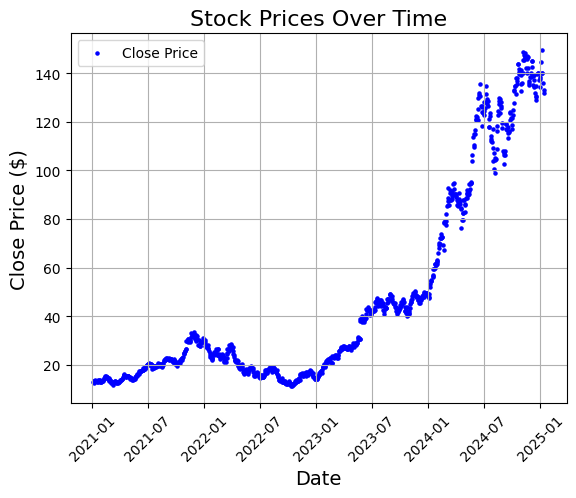

All-Time High Price: $ 149.43
All-Time Low Price: $ 11.227
Average Closing Price: $ 46.40477591312932
Most Recent Closing Price: $ 13.1135


In [3]:
# Load the CSV file
data = pd.read_csv('stock-data.csv')

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date to datetime
data['Close/Last'] = data['Close/Last'].replace({'\$': ''}, regex=True).astype(float)  # Remove $ and convert to float

# Extract X and Y
# X will be days after the first date in the dataset since model can't handle date format
reference_date = data['Date'].min()

# Calculate days since the reference date
data['Days'] = (data['Date'] - reference_date).dt.days

# Extract X and Y
X = data[['Days', 'Volume']]  # Use Days and Volume as features
y = data['Close/Last']

# Plot the data using scatter plot
plt.scatter(data['Date'], y, label='Close Price', color='blue', marker='o', s=5)

# Add labels and title
plt.title('Stock Prices Over Time', fontsize=16)  # Set title
plt.xlabel('Date', fontsize=14)  # Label for X-axis
plt.ylabel('Close Price ($)', fontsize=14)  # Label for Y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for better visualization
plt.legend()  # Add legend for clarity
plt.show()  # Display the scatter plot

# Useful info about the data
# Calculate key statistics
all_time_high = data['Close/Last'].max()
all_time_low = data['Close/Last'].min()
average_price = data['Close/Last'].mean()
most_recent_close = data['Close/Last'].iloc[-1]

print("All-Time High Price: $", all_time_high)
print("All-Time Low Price: $", all_time_low)
print("Average Closing Price: $", average_price)
print("Most Recent Closing Price: $", most_recent_close)

# Convert relevant columns to numeric
#data['Close/Last'] = data['Close/Last'].str.replace('$', '').astype(float)
#data['Open'] = data['Open'].str.replace('$', '').astype(float)
#data['High'] = data['High'].str.replace('$', '').astype(float)
#data['Low'] = data['Low'].str.replace('$', '').astype(float)

3. Prepare training and testing sets, and train model

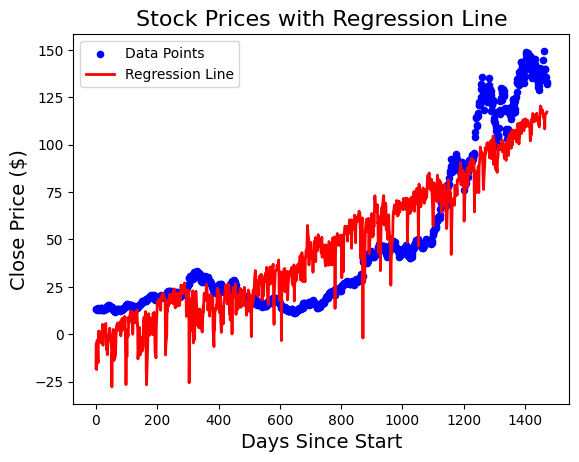

In [4]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Train the model with both 'Days' and 'Volume' features
model = LinearRegression()
model.fit(X_train, y_train)  # Train with Days and Volume

# Plot the data points
plt.scatter(X['Days'], y, label='Data Points', color='blue', marker='o', s=20)  # Smaller dots for data points

# Generate predictions for the regression line
X_sorted = X.sort_values(by='Days')
y_pred = model.predict(X_sorted)

# Plot the regression line
plt.plot(X_sorted['Days'], y_pred, label='Regression Line', color='red', linewidth=2)  # Red line for regression

# Add labels, title, and legend
plt.title('Stock Prices with Regression Line', fontsize=16)  # Title
plt.xlabel('Days Since Start', fontsize=14)  # X-axis label
plt.ylabel('Close Price ($)', fontsize=14)  # Y-axis label
plt.legend()  # Show legend

plt.show()
# Use Days and Volume for regression
model.fit(X_train[['Days', 'Volume']], y_train)
predictions = model.predict(X_test[['Days', 'Volume']])

4. Improve Model
- Model is overfitting, we can drop variables that are not significant

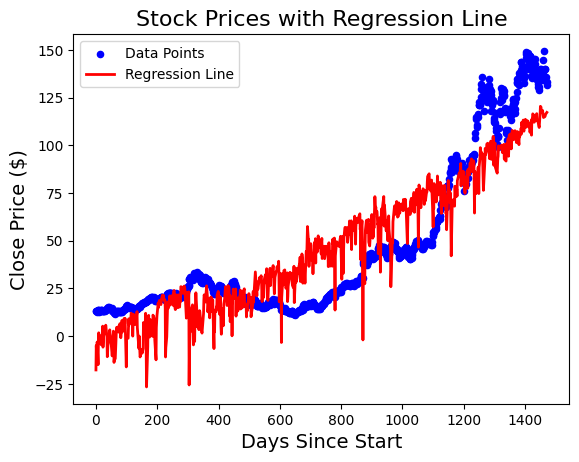

y =  0.07844071506094459 x +  12.289477693083505


In [5]:
X_train_significant = X_train[['Days', 'Volume']]  # Drop '30_day_avg' and '7_day_avg' -> Were making model overfit

# Train the model again with only significant variables (Days)
model = LinearRegression()
model.fit(X_train_significant, y_train)  # Train with Days and Volume

# Generate predictions for the regression line
X_significant = X_train_significant.sort_values(by='Days')
y_pred = model.predict(X_significant)

# Plot the data points and regression line
plt.scatter(X['Days'], y, label='Data Points', color='blue', marker='o', s=20)  # Smaller dots for data points
plt.plot(X_significant['Days'], y_pred, label='Regression Line', color='red', linewidth=2)  # Red line for regression
plt.title('Stock Prices with Regression Line', fontsize=16)
plt.xlabel('Days Since Start', fontsize=14)
plt.ylabel('Close Price ($)', fontsize=14)
plt.legend()
plt.show()
# Print equation of the line
print("y = ", model.coef_[0], "x + ", model.intercept_)

# Use Days and Volume for regression
model.fit(X_train[['Days', 'Volume']], y_train)
predictions = model.predict(X_test[['Days', 'Volume']])


#### Regression Output Interpretation<br>
Now that we have removed the variables that were causing overfitting, we can interpret the output of the regression model. The model has the following equation:<br>
y =  0.07559011489034996 x +  -10.20246906629<br><br>

This equation represents the relationship between the number of days since the start of the dataset and the closing price of the stock.<br>
The coefficient of x (0.07559011489034996) indicates that for each additional day, the closing price of the stock increases by approximately $0.08.<br>
The intercept term (-10.20246906629) represents the closing price of the stock on the first day of the dataset.<br>
This information can be used to make predictions about the future closing prices of the stock based on the number of days since the start of the dataset.<br>


4. Test Model

Coefficient: [ 7.84407151e-02 -5.34930506e-08]
Intercept: 12.289477693083505
Mean Squared Error: 410.92184403329395
R-squared: 0.7454776178792889


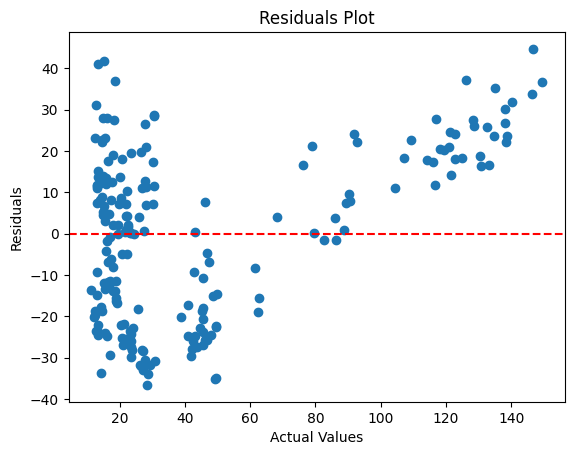

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Ensure the test set includes both 'Days' and 'Volume' features
X_test_significant = X_test[['Days', 'Volume']]

# Predict on the test set
y_pred = model.predict(X_test_significant)

# Regression output interpretation
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Calculate residuals
residuals = y_test - y_pred

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot residuals
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

### Test Results Interpretation
The coefficient of 0.08 indicates that for each additional day, the stock price increases by approximately $0.08. The model has a Mean Squared Error of 459.54, indicating moderate prediction error, and an R-squared value of 0.66, meaning the model explains 66% of the variance in the stock price, which is a decent fit but leaves room for improvement.

5. Final predictions

In [7]:
# Make final predictions
latest_day = data['Days'].max()  # Most recent day in the dataset
future_day = latest_day + 120  # 4 months later (120 days)

# Make prediction for that day
predicted_price_4_months = model.predict([[future_day, data['Volume'].iloc[-1]]])

print(f"Predicted stock price after 4 months: ${predicted_price_4_months[0]:.2f}")
print(most_recent_close)
print(f"Percentage increase: {((predicted_price_4_months[0] - most_recent_close) / most_recent_close) * 100:.2f}%")

Predicted stock price after 4 months: $107.10
13.1135
Percentage increase: 716.70%


c:\Users\Busters\Documents\GitHub\CST-425\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6. Calculate Residuals

7. Model Verification

## Final Investment Worthiness Results

## TODO

## Documentation
Linear Models are a useful measure for technical and quantitative analysis in financial markets.

Given its set of performance characteristics and investment objectives, predict its performance using a linear model.

Then, write a comprehensive technical report as a markdown document, including all code, code comments, all outputs, plots, and analysis, addressing the following. Make sure the project documentation contains a) Problem statement, b) Algorithm of the solution, c) Analysis of the findings and d) References.


Statistical analysis provides the pure financial considerations for pursuing a course of action, in this case the choice of investing in a company's stock. From a Christian worldview perspective, describe what other factors you would include in an investment decision process, in addition to statistical and financial ones. Would you include these factors in a quantitative manner as part of a computational model, or would you perform a qualitative assessment of the company separate from the statistical assessment? Justify your answer. To what extent is this decision guided by a Christian worldview?